<a href="https://colab.research.google.com/github/PPareun/DeepLearningTextBook/blob/main/Keyword_Extractor/Keyword_Ver1/KeywordFromCooccurence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 124595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/n

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import re
tokenize = Hannanum()
oov = [w for w,c in ]
def preprocess(text : str):
  text = re.sub(r'\([^)]*\)' , "", text)
  text = re.sub(r'\[[^)]*\]' , "", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
  tokens = list(tokenize.pos(text))
  relist = []
  N = len(tokens)
  index = 0
  while(index<N):
    word = tokens[index]
    if word[1][0] == 'N' or word[1][0] == 'F' or word[1][0] == 'S':
      concated_word = ""
      while(index < N):
        if(tokens[index][1][0] == 'N' or tokens[index][1][0] == 'F' or tokens[index][1][0] == 'S'):
          concated_word += tokens[index][0] +" "
          index+=1
        else:
          break
      relist.append((concated_word.strip(),'Noun'))
    else:
      relist.append((word[0].strip(),word[1]))
      index+=1
  return relist

In [ ]:
tokens = list(tokenize.pos("""엔데믹 시대 야외 활동 재개에 관련 가전에 관심 """))
print(tokens)

[('엔데믹', 'N'), ('시대', 'N'), ('야외', 'N'), ('활동', 'N'), ('재개', 'N'), ('에', 'J'), ('관련', 'N'), ('가전', 'N'), ('에', 'J'), ('관심', 'N')]


In [ ]:
with open('my_pickle','rb') as f:
    d = pickle.load(f) #해당 단어 앞에 tag가 올 확률 {word, [p/N]}형식

FileNotFoundError: ignored

In [ ]:
def tagging(text):
  num_seeking_token = 6 #앞 뒤로 훑어 볼 형태소 개수
  text = re.sub(r'\([^)]*\)' , " ", text)
  text = re.sub(r'\[[^)]*\]' , " ", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s.-]", "", text)
  sentences = text.split('.')
  for sentence in sentences[:-1]:
    tokens = preprocess(sentence)
    for i, word in enumerate(tokens):
      if word[0] not in d:
        d[word[0]] = [1,2]
      print("Index: %d 품사: %s 단어: %s " %(i,word[1],word[0]))
    tag = int(input("tag Index를 고르세요"))
    for index, word in enumerate(tokens):
      if abs(index-tag) < num_seeking_token + 1: #앞 뒤로 7개의 형태소 분석
        d[word[0]][1] += 1
        if index > tag:
          d[word[0]][0] += 1
  with open( "my_pickle", "rb" ) as file:
    pickle.dump(d, file)

In [ ]:
def Tagger(text:str):
  num_seeking_token = 6 #앞 뒤로 훑어 볼 형태소 개수
  text = re.sub(r'\([^)]*\)' , " ", text)
  text = re.sub(r'\[[^)]*\]' , " ", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s.]", "", text)
  print(text)
  sentences = text.split('.')
  keywords = {}
  primitive_keywords = []
  for sentence in sentences[:-1]:
    tokens = preprocess(sentence)
    probability = [[1,i] for i in range(len(tokens))]
    for i in range(len(tokens)):
      if tokens[i][1] == 'Noun':
        num_count = 0 #곱해지는 확률의 개수
        for j in range(len(tokens)):
          if(abs(j-i)<num_seeking_token+1): 
            num_count += 1
            if(i==j): continue
            if tokens[j][0] not in d:
              d[tokens[j][0]] = [1,2]
            elif(i<j):
              probability[i][0] *= d[tokens[j][0]][0] / d[tokens[j][0]][1]
            else:
              probability[i][0] *= (1-(d[tokens[j][0]][0] / d[tokens[j][0]][1]))
          else:
            break
        probability[i][0] *= (1/2)**(2*num_seeking_token+1-num_count) #확률값 정규화를 위해 설정
      else:
        probability[i] = [0,i]
    probability.sort(key = lambda x:x[0],reverse = True)
    for x in probability[:3]: #각 문장에서 최대 3개의 키워드 생성
      primitive_keywords.append([tokens[x[1]][0], x[0]]) #[word, 확률] 데이터로 반환
  

  for keyword in primitive_keywords:
    words = keyword[0].split(' ')
    for word in words:
      if word in keywords:
        keywords[word] += 1
      else:
        keywords[word] = 1
  wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, max_font_size=250)
  gen = wc.generate_from_frequencies(keywords)
  plt.figure()
  plt.imshow(gen)
  

In [ ]:
while(True):
  text = input("텍스트를 입력해주세요")
  if(text == ""):
    break
  tagging('"""'+ text+'"""')

텍스트를 입력해주세요


오픈AI도 대규모 언어모델의 이러한 결함을 고치기가 어렵다는 사실을 인정한다. 대규모 언어모델이 사실과 허구를 구분할 수 있도록 가르칠 방법은 없다. 그렇다고 모델이 답변을 더 신중하게 내놓도록 학습시키면 그 모델은 정확한 답변을 내놓을 수 있는 질문까지도 대답하지 않게 되는 경우가 많다. 무라티는 우리는 언어모델이 뛰어난 능력을 가지고 있다는 것을 잘 알고 있다며 하지만 언어모델이 내놓는 답변 중에서 어떤 대답이 유용한지 또는 유용하지 않은지 판단하기가 쉽지 않으므로 모델의 조언을 신뢰하기 어렵다고 설명했다.

오픈AI는 웹GPT 라는 이름을 가진 언어모델도 제작하고 있다. 이 언어모델은 인터넷에서 정보를 찾아서 답변에 대한 출처를 제공한다. 슐먼은 몇 달 후에는 챗GPT에 이 기능을 추가해서 업그레이드할 수도 있다고 언급했다.

AI 업체 허깅페이스 의 연구원이자 오픈소스 대규모 언어모델 블룸 을 개발한 팀을 이끈 테븐 르 스카오 는 정보를 찾는 능력이야말로 언어모델을 신뢰할 수 있는 존재로 만들기 위한 핵심이라고 생각한다. 그는 인간의 피드백을 바탕으로 미세 조정하는 것으로는 사실성에 대한 문제를 해결할 수 없다고 지적했다.

그러나 르 스카오는 이 문제를 해결할 수 없다고는 생각하지 않는다. 그는 아직 해결책을 찾아내지는 못했지만 사실 이러한 언어모델 세대는 등장한 지 겨우 2년 밖에 되지 않았다고 말했다.

오픈AI는 사람들이 챗GPT 데모를 시도해 보고 문제가 있는 부분을 알려주기를 바란다. 이는 기술을 개선하고 결함을 찾아내는 좋은 방법이다. 아마도 언젠가는 결함을 모두 수정할 수 있을지도 모른다. GPT4가 곧 출시된다고 해서 아직은 GPT4가 말하는 모든 내용을 믿어서는 안 된다.


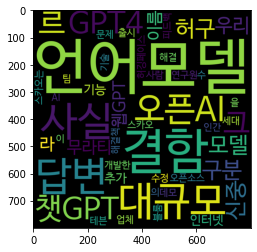

In [ ]:
Tagger("""오픈AI도 대규모 언어모델의 이러한 결함을 고치기가 어렵다는 사실을 인정한다. 대규모 언어모델이 사실과 허구를 구분할 수 있도록 가르칠 방법은 없다. 그렇다고 모델이 답변을 더 신중하게 내놓도록 학습시키면 그 모델은 정확한 답변을 내놓을 수 있는 질문까지도 대답하지 않게 되는 경우가 많다. 무라티는 “우리는 언어모델이 뛰어난 능력을 가지고 있다는 것을 잘 알고 있다”며 “하지만 언어모델이 내놓는 답변 중에서 어떤 대답이 유용한지 또는 유용하지 않은지 판단하기가 쉽지 않으므로 모델의 조언을 신뢰하기 어렵다”고 설명했다.

오픈AI는 웹GPT(WebGPT)라는 이름을 가진 언어모델도 제작하고 있다. 이 언어모델은 인터넷에서 정보를 찾아서 답변에 대한 출처를 제공한다. 슐먼은 몇 달 후에는 챗GPT에 이 기능을 추가해서 업그레이드할 수도 있다고 언급했다.

AI 업체 허깅페이스(Hugging Face)의 연구원이자 오픈소스 대규모 언어모델 블룸(BLOOM)을 개발한 팀을 이끈 테븐 르 스카오(Teven Le Scao)는 정보를 찾는 능력이야말로 언어모델을 신뢰할 수 있는 존재로 만들기 위한 핵심이라고 생각한다. 그는 “인간의 피드백을 바탕으로 미세 조정하는 것으로는 ‘사실성’에 대한 문제를 해결할 수 없다”고 지적했다.

그러나 르 스카오는 이 문제를 해결할 수 없다고는 생각하지 않는다. 그는 “아직 해결책을 찾아내지는 못했지만, 사실 이러한 언어모델 세대는 등장한 지 겨우 2년 밖에 되지 않았다”고 말했다.

오픈AI는 사람들이 챗GPT 데모를 시도해 보고 문제가 있는 부분을 알려주기를 바란다. 이는 기술을 개선하고 결함을 찾아내는 좋은 방법이다. 아마도 언젠가는 결함을 모두 수정할 수 있을지도 모른다. GPT-4가 곧 출시된다고 해서 아직은 GPT-4가 말하는 모든 내용을 믿어서는 안 된다.""")

모든 부서에서 인공지능을 활용하는 것... 이것은 아우디 가 데이터 중심 기업으로 거듭나기 위한 새로운 목표다.

현재 아우디는 디자이너들에게 새로운 영감의 원천을 열어주는 인공지능을 사용하고 있으며 독일 잉골슈타트  아우디 본사의 디자인 스튜디오에서 새로운 휠을 만드는 디자이너들도 마찬가지다.

이 인공지능은 아우디의 IT 부서와 아우디 디자인팀이 자체적으로 개발한 인공지능 강화학습  플랫폼 펠간 이다.

FelGAN은 독일어 Felge 과 GAN 의 약어다. 일반적으로 GAN은 두개의 모델로 하나는 생성기생성자  이며 또 하나는 판별기판별자 로 두 모델은 서로 경쟁하면서 서로에게 영향을 미치면서 고도화된다.

아우디의 FelGAN 작동 방식은 두 알고리즘 중 하나인 생성기는 특정 모티프의 차량 바퀴 이미지를 만든다. 경쟁자인 판별기는 생성기의 이미지와 함께 실제 바퀴 사진으로 구성된 이미지 선택하고 각 이미지가 생성자의 생성인지 실제 사진인지를 식별한다. 이 과정은 훈련이 완료될 때까지 계속해서 반복된다.

특히 아우디는 이 두 알고리즘 모두 실수로부터 학습하고 지속적으로 개선하도록 설계되었다. 충분히 실행한 후 생성기의 생성물은 너무나 사실적이어서 사람의 눈으로도 실제 사진과 구분할 수 없거나 아주 어렵게 구분할 수 있다고 한다.

또한 파이썬 의 라이브러리 스트림릿 을 기반으로 하는 직관적인 사용자 인터페이스는 아우디 디자인 팀과 IT 팀 간에 짧은 개발 주기와 빠른 피드백을 생성한다. 또 별도의 하드웨어에 의존할 필요가 없도록 많은 처리 능력이 필요한 AI 애플리케이션의 모든 구성 요소는 클라우드에서 실행된다.

FelGAN의 또 다른 이점은 소프트웨어가 AI가 만드는 각 디자인에 수학적 값을 할당한다는 것이다. 개발자가 DNA라고 부르는 이러한 값은 디자인을 재현하는 데 언제든지 사용할 수 있다. 하지만 그게 다는 아니다. 아우디 디자이너는 자신의 디자인과 이미지를 프로그램에 입력하여 가상 실험에 추가할 수도 있다. 이는 디자이너가 제공하는 이미지에

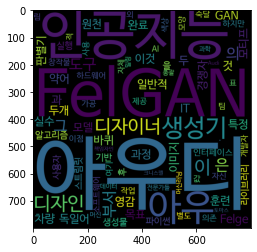

In [ ]:
Tagger(""""모든 부서에서 인공지능을 활용하는 것!"... 이것은 아우디(Audi)가 데이터 중심 기업으로 거듭나기 위한 새로운 목표다.

현재, 아우디는 디자이너들에게 새로운 영감의 원천을 열어주는 인공지능을 사용하고 있으며, 독일 잉골슈타트(Ingolstadt) 아우디 본사의 디자인 스튜디오에서 새로운 휠을 만드는 디자이너들도 마찬가지다.

이 인공지능은 아우디의 IT 부서와 아우디 디자인팀이 자체적으로 개발한 인공지능 강화학습(RL) 플랫폼 '펠간(FelGAN)'이다.

'FelGAN'은 독일어 'Felge(rim)'과 'GAN(Generative Adversarial Networks, 적대적 생성 신경망)'의 약어다. 일반적으로 GAN은 두개의 모델로, 하나는 생성기·생성자(G, Generator) 이며, 또 하나는 판별기·판별자(D, Discriminator)로 두 모델은 서로 경쟁하면서 서로에게 영향을 미치면서 고도화된다.

아우디의 FelGAN 작동 방식은 두 알고리즘 중 하나인 '생성기'는 특정 모티프의 차량 바퀴 이미지를 만든다. 경쟁자인 '판별기'는 생성기의 이미지와 함께 실제 바퀴 사진으로 구성된 이미지 선택하고 각 이미지가 생성자의 생성인지 실제 사진인지를 식별한다. 이 과정은 훈련이 완료될 때까지 계속해서 반복된다.

특히, 아우디는 이 두 알고리즘 모두 실수로부터 학습하고 지속적으로 개선하도록 설계되었다. 충분히 실행한 후 생성기의 생성물은 너무나 사실적이어서 사람의 눈으로도 실제 사진과 구분할 수 없거나 아주 어렵게 구분할 수 있다고 한다.

또한 파이썬(python)의 라이브러리 스트림릿(Streamlit)을 기반으로 하는 직관적인 사용자 인터페이스는 아우디 디자인 팀과 IT 팀 간에 짧은 개발 주기와 빠른 피드백을 생성한다. 또, 별도의 하드웨어에 의존할 필요가 없도록 많은 처리 능력이 필요한 AI 애플리케이션의 모든 구성 요소는 클라우드에서 실행된다.

FelGAN의 또 다른 이점은 소프트웨어가 AI가 만드는 각 디자인에 수학적 값을 할당한다는 것이다. 개발자가 DNA라고 부르는 이러한 값은 디자인을 재현하는 데 언제든지 사용할 수 있다. 하지만 그게 다는 아니다. 아우디 디자이너는 자신의 디자인과 이미지를 프로그램에 입력하여 가상 실험에 추가할 수도 있다. 이는 디자이너가 제공하는 이미지에 적합한 DNA 값을 결정하는 특수 알고리즘을 기반으로 한다.

FelGAN은 다수의 사실적인 디자인 자체를 신속하게 제안하거나, 기존 디자인을 원하는 것으로 재결합하는 방식으로 작동한다. 이를 통해 아우디의 림 디자인 팀을 위한 일종의 아이디어 허브 역할로 새로운 버전과 변형을 교환할 수 있다. 이 도구를 사용하면 설계자는 모양, 색상, 표면 구조 및 기타 매개변수를 실시간으로 쉽게 확인할 수 있다.

디자이너는 FelGAN의 창작물에서 개별 요소만 사용하여 조화로운 전체 디자인으로 다듬는다. 여기서 작업 도구의 숙달 외에도 창의적인 안목과 전문적인 경험이 결정적인 역할을 한다. 마지막으로 아우디의 가공 전문가들은 밀링 머신을 사용하여 플라스틱 또는 알루미늄으로 휠의 프로토타입을 제작하여 가상 디자인을 현실로 만드는 것이다.

아우디의 인공지능 머신러닝 및 데이터 과학 총괄 책임자인 토마스 크니스펠(Thomas Knispel)은 "Audi는 데이터 기반 기업이 되겠다는 목표로 우리는 더 많은 부서에서 AI를 사용할 것이며, 우리 팀은 항상 새로운 기술을 찾고 있습니다”라고 말했다.

이어 그는 "FelGAN의 기술은 Audi의 다른 부서의 설계자에게 영감의 원천이 될 수 있는 포괄적인 AI 설계 플랫폼으로 확장될 수 있을 것입니다"며, "아울러 이번 FelGAN이 생성한 휠과 또 다른 AI 애플리케이션들이 탄소 중립 등에 어떠한 영향을 미치는지 평가하는 AI 평가시스템을 현재 개발 중이며, 아우디가 디지털 데이터 기반 회사가 되기 위한 다양한 시도를 계속 이어갈 것입니다"라고 덧붙였다. (아래는 아우디, 강화학습 플랫폼 'FelGAN'으로 휠 디자인 영상)""")

오픈AI GPT3.5의 새 AI 챗봇기능 둘러싼 논란 가열 조짐
기능은 매우 우수하나 진위 분간 어려운 위험도 있어

오픈AI가 지난달 말 공개한 GPT3.5의 새로운 인공지능  챗봇 기능인 챗GPT  서비스가 일주일만에 100만명 이상의 이용자를 끌어모아 화제가 되고 있다. 100만 이용자 확보는 GPT3와 달리가 24개월 가까이 걸려 이룬 성과다.

챗GPT는 질문을 하거나 명령어를 입력하면 사려 깊고 설득력있는 응답을 제공해 학계는 물론 엔지니어들 사이에서 큰 인기를 끌고 있다. 

그러나 사실과 다른 내용까지도 그럴듯하게 포장해 거짓을 사실처럼 믿게 만드는 부작용이 있다는 지적도 적지않아 실효성을 둘러싼 논란이 거세질 전망이다.  

오픈AI가 이번에 내놓은 챗봇 기능은 인간같은 답변을 내놓을뿐만 아니라 전후 맥락을 정확히 파악하는 상황 인식을 해내는 특성 덕분에 폭발적인 관심을 불러왔다. 특히 사용하기 쉬운 무료 웹 인터페이스로 대중에게 인기를 끌고 있다. 

챗GPT는 오픈AI의 대형 언어모델인 GPT3의 뒤를 잇는 GPT3.5를 기반으로 하는 대화형 텍스트 생성 모델이다. 아직은 프로토타입이지만 사람처럼 상세한 텍스트를 생성할 수 있다. 인터넷에서 가져온 방대한 양의 텍스트 샘플로 훈련하고 대화형 인터페이스를 통해 정보를 제공한다.

대화 형식으로 후속 질문에 답하거나 실수를 인정한다. 또 잘못된 전제에 이의를 제기하거나 부적절한 요청을 거부하는 등 훨씬 똑똑해졌다는 평가가 이어진다. 대부분의 AI 챗봇은 모든 새로운 요청을 백지 상태로 취급하고 이전 대화를 기억하거나 학습하도록 프로그래밍되지 않았지만 챗GPT는 사용자가 이전에 말한 내용을 기억할 수 있다 .

시를 쓰거나 자세한 예제와 함께 코딩 실수를 수정하고 AI 아트 프롬프트를 생성하기도 한다. 새 코드를 작성하고 레이아웃 문제 및 최적화 쿼리 해결 등 복잡한 질문에 대한 설명과 답변을 제공하는 것도 가능하다.

시험 문제를 보고 생성한 답이 만점을 받은 것은 물론이고 프로그래머가 제시한 

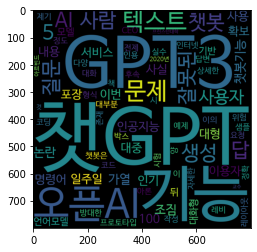

In [ ]:
Tagger("""오픈AI 'GPT-3.5'의 새 AI 챗봇기능 둘러싼 논란 가열 조짐…
기능은 매우 우수하나 진위 분간 어려운 위험도 있어

오픈AI가 지난달 말 공개한 'GPT-3.5'의 새로운 인공지능(AI) 챗봇 기능인 ‘챗GPT(ChatGPT)’ 서비스가 일주일만에 100만명 이상의 이용자를 끌어모아 화제가 되고 있다. 100만 이용자 확보는 'GPT3'와 '달리'가 24개월 가까이 걸려 이룬 성과다.

챗GPT는 질문을 하거나 명령어를 입력하면 사려 깊고 설득력있는 응답을 제공해 학계는 물론 엔지니어들 사이에서 큰 인기를 끌고 있다. 

그러나 사실과 다른 내용까지도 그럴듯하게 포장해 거짓을 사실처럼 믿게 만드는 부작용이 있다는 지적도 적지않아 실효성을 둘러싼 논란이 거세질 전망이다.  

오픈AI가 이번에 내놓은 챗봇 기능은 인간같은 답변을 내놓을뿐만 아니라 전후 맥락을 정확히 파악하는 상황 인식을 해내는 특성 덕분에 폭발적인 관심을 불러왔다. 특히 사용하기 쉬운 무료 웹 인터페이스로 대중에게 인기를 끌고 있다. 

챗GPT는 오픈AI의 대형 언어모델인 GPT-3의 뒤를 잇는 GPT-3.5를 기반으로 하는 대화형 텍스트 생성 모델이다. 아직은 프로토타입이지만 사람처럼 상세한 텍스트를 생성할 수 있다. 인터넷에서 가져온 방대한 양의 텍스트 샘플로 훈련하고, 대화형 인터페이스를 통해 정보를 제공한다.

대화 형식으로 후속 질문에 답하거나 실수를 인정한다. 또 잘못된 전제에 이의를 제기하거나 부적절한 요청을 거부하는 등 훨씬 똑똑해졌다는 평가가 이어진다. 대부분의 AI 챗봇은 모든 새로운 요청을 백지 상태로 취급하고 이전 대화를 기억하거나 학습하도록 프로그래밍되지 않았지만 챗GPT는 사용자가 이전에 말한 내용을 기억할 수 있다 .

시를 쓰거나 자세한 예제와 함께 코딩 실수를 수정하고, AI 아트 프롬프트를 생성하기도 한다. 새 코드를 작성하고, 레이아웃 문제 및 최적화 쿼리 해결 등 복잡한 질문에 대한 설명과 답변을 제공하는 것도 가능하다.

시험 문제를 보고 생성한 답이 만점을 받은 것은 물론이고 프로그래머가 제시한 프로그래밍 언어 코딩 문제를 몇 초 만에 해결하기도 했다.

이처럼 다양한 장점에 아론 레비 박스 CEO는 "챗GPT는 앞으로 모든 것이 어떻게 달라질지 희미하게나마 볼 수 있는 기술 가운데 하나"라고 평가했고, 알베르토 로메로 알고리즈믹 브릿지 저자는 "지금까지 본 세계 최고의 챗봇"이라는 찬사를 보냈다.

일론 머스크 테슬라 CEO도 "챗GPT가 무섭게 좋다"며 "위험할 정도로 강력한 AI"라고 트윗했다.
그러나, 다른 한편으로는 많은 사용자가 챗GPT의 기능에 깊은 인상을 받은 반면 챗GPT에 숨겨진 문제가 있다는 지적도 나온다.

챗GPT가 정확하지 않은 잘못된 답변인 경우에도 그럴듯하고 사실처럼 들리도록 설득력 있는 응답을 신속하게 내뱉는다는 것이다. 또 존재하지도 않는 책을 인용해 신뢰가 있는 것처럼 꾸민 답변을 내놓는 등 사실이 아닌 내용을 합리적으로 들리게하는 데 매우 능숙한 것으로 드러났다.  

오픈AI가 2020년에 GPT-3를 출시했을 때도 GPT-3가 특정 질문에 대한 잘못된 답변을 자신 있게 주장하거나 때로는 인종 차별적이거나 공격적인 텍스트를 생성해 비판을 받기도 했다.

더 문제가 되는 것은 사용자가 질문에 대한 답변을 이미 알고 있지 않다면 챗GPT의 답변이 사실인지 아닌지 알기 어렵다는 것이다. 

아르빈드 나라야난 프린스턴대학 교수는 "사람들은 학습에 챗GPT를 사용하는 것에 흥분하고 있지만 답을 미리 알지 못한 상황에서는 틀린 답이 나오더라도 알 수 없는 것이 문제"라며 "몇 가지 기본적인 정보 보안에 대한 질문을 시도해보니 대부분의 경우 대답은 그럴듯하게 들렸지만 사실은 잘못된 것이었다"고 지적했다.""")

  우리의 삶에서 인공지능은 이제 떼려야 뗄 수 없는 관계가 됐다. 과거에는 상상만 했던 일들이 인공지능 기술로 새로운 환경을 만들고 있기 때문이다. 특히 최근에는 진짜 사람처럼 두뇌를 비롯해 눈 입 귀 손 등 오감 을 대신할 수 있을 정도로 고도화된 성능으로 뛰어난 효용성을 입증하고 있다. 사회 곳곳에서 인간의 눈과 귀 손과 발이 되고 있는 인공지능 기술 어디까지 진출했을까. 

인간의 두뇌와 같은 대화형 AI 기술 고도화로 인공지능 생태계 확장
인간의 언어 처리 능력을 담당하는 기관이 두뇌인데 이러한 능력을 갖춘 AI는 대화형 AI라 부른다. 대화형 AI는 이미 챗봇 보이스봇 등 친숙한 모습으로 일상에 스며들어 있다. 이 기술력은 빠른 속도로 진화를 거듭해 인간의 감정에 감응하고 의도를 파악해 진짜 인간처럼 대화할 수 있는 고도화된 수준에 이르렀다.

스켈터랩스는 챗봇 보이스봇 STT  TTS  MRC  등 대화형 AI의 전 분야를 지원하는 솔루션을 개발해 국내외 기업들의 디지털 전환 을 이끌고 있다. 여기에 독보적인 대화형 AI 기술력을 다양한 분야에 접목시키며 인공지능 생태계를 확장 인간과 인공지능이 융화하는 새로운 세상의 청사진을 제시하고 있다.

스켈터랩스는 에이스토리 에이아이엠씨 네오사피엔스 등과 MOU를 체결하고 배우 주현영의 IP를 확보 대화형 AI에 페르소나를 입혀 구현한 디지털 휴먼을 개발 중이다. 또한 더블유에이아이와의 협업을 통해 대화형 AI를 금융권에 최적화된 엔진으로 구성하고 진짜 사람처럼 대화할 수 있는 인공지능 상담원 역할을 수행할 수 있도록 AICC 도 개발 중이다.

스마일게이트 다양한 목소리를 모아 하나의 소리로 화음을 만들다
스마일게이트는 최근 VFX  전문기업 자이언트스텝과 함께 만들어낸 디지털 휴먼 한유아를 가수로 전격 데뷔시켰다.

디지털 휴먼 한유아의 목소리는 다양한 연령대 수백 명의 보이스 데이터를 취합한 뒤 인공지능으로 합성해 최적의 목소리를 만들어냈다. 또한 더욱 사람과 같이 소통하기 위해 한유아를 구성하는 인

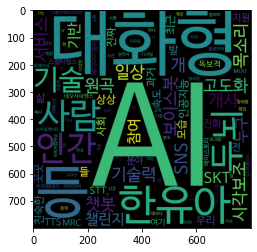

In [ ]:
Tagger("""[한경잡앤조이=강홍민 기자] 우리의 삶에서 인공지능은 이제 떼려야 뗄 수 없는 관계가 됐다. 과거에는 상상만 했던 일들이 인공지능 기술로 새로운 환경을 만들고 있기 때문이다. 특히 최근에는 진짜 사람처럼 두뇌를 비롯해 눈, 입, 귀, 손 등 오감(五感)을 대신할 수 있을 정도로 고도화된 성능으로 뛰어난 효용성을 입증하고 있다. 사회 곳곳에서 인간의 눈과 귀, 손과 발이 되고 있는 인공지능 기술, 어디까지 진출했을까. 

인간의 ‘두뇌’와 같은 대화형 AI, 기술 고도화로 인공지능 생태계 확장
인간의 언어 처리 능력을 담당하는 기관이 ‘두뇌’인데, 이러한 능력을 갖춘 AI는 ‘대화형 AI’라 부른다. 대화형 AI는 이미 챗봇, 보이스봇 등 친숙한 모습으로 일상에 스며들어 있다. 이 기술력은 빠른 속도로 진화를 거듭해 인간의 감정에 감응하고 의도를 파악해 진짜 인간처럼 대화할 수 있는 고도화된 수준에 이르렀다.

스켈터랩스는 △챗봇, △보이스봇, △STT(Speech-to-Text), △TTS(Text-to-Speech), △MRC((Machine Reading Comprehension) 등 대화형 AI의 전 분야를 지원하는 솔루션을 개발해 국내외 기업들의 디지털 전환(DX)을 이끌고 있다. 여기에 독보적인 대화형 AI 기술력을 다양한 분야에 접목시키며 인공지능 생태계를 확장, 인간과 인공지능이 융화하는 새로운 세상의 청사진을 제시하고 있다.

스켈터랩스는 에이스토리, 에이아이엠씨, 네오사피엔스 등과 MOU를 체결하고 배우 주현영의 IP를 확보, 대화형 AI에 페르소나를 입혀 구현한 ‘디지털 휴먼’을 개발 중이다. 또한 더블유에이아이와의 협업을 통해 대화형 AI를 금융권에 최적화된 엔진으로 구성하고 진짜 사람처럼 대화할 수 있는 ‘인공지능 상담원’ 역할을 수행할 수 있도록 AICC(인공지능 컨택센터)도 개발 중이다.

스마일게이트, 다양한 목소리를 모아 하나의 소리로 화음을 만들다
스마일게이트는 최근 VFX(visual effect) 전문기업 ▲자이언트스텝과 함께 만들어낸 디지털 휴먼 ‘한유아’를 가수로 전격 데뷔시켰다.

디지털 휴먼 한유아의 목소리는 다양한 연령대 수백 명의 보이스 데이터를 취합한 뒤, 인공지능으로 합성해 최적의 목소리를 만들어냈다. 또한, 더욱 사람과 같이 소통하기 위해 한유아를 구성하는 인공지능에 단행본 216만 권에 해당하는 863GB의 언어 데이터를 학습시켰다. 이외에도 2만 5000개 이상의 블로그 포스트, 180만 개 이상의 기사, 1억 4000만여 개의 댓글을 비롯해 표준국어대사전, 국립국어원의 ‘모두의 말뭉치’ 등을 거쳐 소설가 우다영씨와 대화하는 심화학습까지 마쳤다.

이러한 트레이닝을 거친 한유아는 최근 리메이크 싱글 음원 ‘너의 외로움이 날 부를 때’를 발매했다. 한국대중음악 100대 명반에 꼽힌 포크팝 명곡으로 원곡 가수는 장필순이다. 원곡 가사를 개사해 답가 형식으로 리메이크했다. 개사는 원작사 조동희가 맡았다.

SK텔레콤, 시각장애인 위한 시각보조 AI 서비스 고도화 앞장
SK텔레콤(이하 SKT)은 고객 참여형 SNS 챌린지를 통해 모은 사진을 기반으로 소셜 벤처 ▲투아트의 시각보조 AI 서비스인 ‘설리번플러스’의 학습을 지원, 시각장애인을 위한 시각보조 AI 서비스 고도화에 나섰다.

설리번플러스는 국내 유일의 AI 기반 시각보조 음성안내 앱으로, 시각장애인들과 저시력자들이 스마트폰의 카메라를 통해 사람·글자·사물·색상 등을 쉽게 인식할 수 있도록 돕는다. 이 서비스를 제공하기 위해 이미지캡셔닝 기술을 포함한 다양한 인공지능 알고리즘을 활용하는데, 이러한 알고리즘을 고도화하기 위해서는 다양한 상황과 사물, 인물을 포착한 이미지 정보의 학습이 필요하다.

SKT는 누구나 손쉽게 참여할 수 있는 SNS 챌린지를 실시해 사진을 모으고, 설리번플러스의 모델 학습을 지원한다. ‘착한 한 장 챌린지’는 누구나 손쉽게 참여할 수 있다. 본인의 SNS 계정에 일상 속 사물과 인물을 촬영하고 ‘#코드네임설리번’, ’#착한한장챌린지’라는 해시태그와 함께 사진을 게재하면 된다. 참여자는 매주 SKT 인스타그램에서 새롭게 제시하는 주제에 맞춰 여러 번 참여할 수 있으며, 챌린지에 참여할 다음 사람을 지목해 지인들을 초대할 수도 있다.""")

이번 콘서트는 배경훈 원장의 키노트를 통해 기초 연구 산학을 넘어선 공동연구 현황 AI 글로벌 리더십 확보를 위한 여러 활동 등 LG AI연구원의 주요 성과를 발표하는 것으로 시작할 계획입니다. 특히 다양한 전문 분야에서 활약하며 인간을 돕는 LG AI연구원의 Expert AI가 각 전문가 영역별로 어떤 연구를 진행하고 있는지 이와 함께 LG AI연구원이 앞으로 시도할 새로운 도전과 나아갈 방향에 관해서도 이야기할 예정입니다.

뒤이어 AI 분야의 세계적인 석학인 LG AI연구원 이홍락 CSAI  가 새롭게 향상된 EXAONE 모델의 특장점과 분야별 활용 기술에 관해 이야기하는 시간을 마련했습니다. 더불어 고객을 위해 크리에이터를 위해 기업의 생산성을 위해 기초 연구 분야에서의 발전을 위해 현장에서 LG AI연구원을 직접 진두지휘해온 리더들이 AI연구원의 2022년을 직접 소개합니다.

또한 출범 두 번째 해를 성공적으로 보낸 LG AI연구원이 진행한 다양한 기초 연구에 관해 소개도 이어지며 특히 다양한 연구 기관과 협력해 적극적으로 학계 및 업계와 공동으로 연구를 진행한 AI연구원의 현위치와 앞으로 더욱 눈부시게 성장할 LG AI연구원의 기초 연구 방향성에 대해 제시할 예정입니다.

마지막으로는 최근 AI 연구 환경이 빠르게 변화하며 날이 갈수록 그 중요도가 높아지고 있는 AI 윤리 원칙에 관해 이야기하는 시간을 준비했습니다. 기술을 넘어 고객의 삶을 더 가치 있게 우리 사회를 건강하고 지속 가능하게 만들기 위해 LG 그룹 경영이념을 담아 마련한 AI 윤리 원칙과 관련 연구를 소개하는 시간을 가집니다.

현장에는 미리 보는 LG AI Talk Concert로 소개해드린 것에 더해 AI연구원과 연구에 관한 더욱 많은 이야기를 알차게 준비했습니다. LG AI연구원의 지난날과 오늘 그리고 앞으로를 살펴볼 수 있는 2022 LG AI Talk Concert는 12월 8일 오전 10시부터 LG AI연구원의 유튜브 채널을 통해 라이브로 진행될 예정이니 많은 관심 부탁드

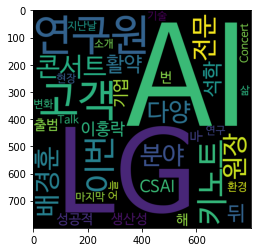

In [ ]:
Tagger("""이번 콘서트는 배경훈 원장의 키노트를 통해 기초 연구, 산학을 넘어선 공동연구 현황, AI 글로벌 리더십 확보를 위한 여러 활동 등 LG AI연구원의 주요 성과를 발표하는 것으로 시작할 계획입니다. 특히, 다양한 전문 분야에서 활약하며 인간을 돕는 LG AI연구원의 Expert AI가 각 전문가 영역별로 어떤 연구를 진행하고 있는지, 이와 함께 LG AI연구원이 앞으로 시도할 새로운 도전과 나아갈 방향에 관해서도 이야기할 예정입니다.

뒤이어 AI 분야의 세계적인 석학인 LG AI연구원 이홍락 CSAI (Chief Scientist of AI)가 새롭게 향상된 EXAONE 모델의 특장점과 분야별 활용 기술에 관해 이야기하는 시간을 마련했습니다. 더불어, 고객을 위해, 크리에이터를 위해, 기업의 생산성을 위해, 기초 연구 분야에서의 발전을 위해 현장에서 LG AI연구원을 직접 진두지휘해온 리더들이 AI연구원의 2022년을 직접 소개합니다.

또한, 출범 두 번째 해를 성공적으로 보낸 LG AI연구원이 진행한 다양한 기초 연구에 관해 소개도 이어지며, 특히 다양한 연구 기관과 협력해 적극적으로 학계 및 업계와 공동으로 연구를 진행한 AI연구원의 현위치와 앞으로 더욱 눈부시게 성장할 LG AI연구원의 기초 연구 방향성에 대해 제시할 예정입니다.

마지막으로는 최근 AI 연구 환경이 빠르게 변화하며 날이 갈수록 그 중요도가 높아지고 있는 AI 윤리 원칙에 관해 이야기하는 시간을 준비했습니다. 기술을 넘어 고객의 삶을 더 가치 있게, 우리 사회를 건강하고 지속 가능하게 만들기 위해 LG 그룹 경영이념을 담아 마련한 AI 윤리 원칙과 관련 연구를 소개하는 시간을 가집니다.

현장에는 미리 보는 LG AI Talk Concert로 소개해드린 것에 더해 AI연구원과 연구에 관한 더욱 많은 이야기를 알차게 준비했습니다. LG AI연구원의 지난날과 오늘 그리고 앞으로를 살펴볼 수 있는 2022 LG AI Talk Concert는 12월 8일 오전 10시부터 LG AI연구원의 유튜브 채널을 통해 라이브로 진행될 예정이니 많은 관심 부탁드립니다.

""")

데일리포스트김정은 기자메타가 자체 개발한 인공지능 으로 단백질 구조 6억 개 이상을 예측하는데 성공했다.

페이스북과 인스타그램을 운영하는 메타는 단백질 입체 구조를 예측하는 AI 언어모델 ESM2를 사용해 6억 1700만종 이상의 메타게놈  단백질 구조를 예측한 데이터베이스인 ESM 메타게놈 아틀라스 를 공개했다. 연구결과는 논문 사전공개 사이트 바이오 아카이브에 게재됐다. 

생물을 구성하는 단백질 정보는 생물학과 의학 연구에서 매우 중요하지만 인류가 단백질에 대해 아는 정보는 일부에 불과하다. 단백질 염기서열이 접혀서 만드는 3차원 구조를 풀어내는 단백질 폴딩 문제는 연구자들에게 매우 까다로운 과제이기 때문이다. 이러한 단백질 폴딩 문제에 대처하는 방법으로 최근 AI를 이용한 단백질 입체 구조 예측 시도가 큰 주목을 받고 있다. 

알파벳 산하 AI 연구소 구글 딥마인드가 개발한 단백질 구조 예측 AI 알파폴드 는 단시간에 저렴한 비용으로 실험적 기법과 동등한 정확도로 단백질 입체구조의 예측에 성공했다. 알파폴드는 2021년 7월 오픈소스로 공개돼 생물학 지평을 확장시켰다는 평가를 받고 있다. 또 2022년 7월에는 알파폴드가 예측한 2억 개 이상의 단백질 입체 구조가 검색 가능한 데이터베이스 형태로 공개됐다. 

이런 가운데 메타 AI 연구팀은 알파폴드를 크게 능가하는 6억 1700만종 이상의 박테리아바이러스미생물 단백질 구조를 예측한 데이터베이스 ESM 메타게놈 아틀라스를 공개했다. 

메타게놈은 1998년 조 핸델스만 가 주어진 환경에 존재하는 모든 미생물의 유전체의 집합으로 정의한 바 있다. 그러나 대략 1 미만의 극히 일부만 보통의 실험실 조건에서 배양할 수 있어 순수배양기술만으로 얻어지는 미생물 종류는 극히 제한돼 있다. 

이러한 한계를 극복하고 자연계 대다수의 미생물 유전 자원을 연구하고자 하는 필요성에 의해 미생물의 순수 분리 및 배양 단계에 의존하지 않고 시료에서 직접 DNA를 추출하여 혼합된 DNA를 분석하는 메타게노믹스 란 연구 분야

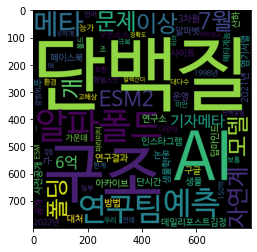

In [ ]:
Tagger("""ㅣ데일리포스트=김정은 기자ㅣ메타가 자체 개발한 인공지능(AI)으로 단백질 구조 6억 개 이상을 예측하는데 성공했다.

페이스북과 인스타그램을 운영하는 메타는 단백질 입체 구조를 예측하는 AI 언어모델 'ESM-2'를 사용해 6억 1700만종 이상의 메타게놈(Metagenome) 단백질 구조를 예측한 데이터베이스인 'ESM 메타게놈 아틀라스(ESM Metagenomic Atlas)'를 공개했다. 연구결과는 논문 사전공개 사이트 '바이오 아카이브'에 게재됐다. 

생물을 구성하는 단백질 정보는 생물학과 의학 연구에서 매우 중요하지만, 인류가 단백질에 대해 아는 정보는 일부에 불과하다. 단백질 염기서열이 접혀서 만드는 3차원 구조를 풀어내는 단백질 폴딩 문제는 연구자들에게 매우 까다로운 과제이기 때문이다. 이러한 단백질 폴딩 문제에 대처하는 방법으로 최근 AI를 이용한 단백질 입체 구조 예측 시도가 큰 주목을 받고 있다. 

알파벳 산하 AI 연구소 구글 딥마인드가 개발한 단백질 구조 예측 AI '알파폴드(AlphaFold)'는 단시간에 저렴한 비용으로 실험적 기법과 동등한 정확도로 단백질 입체구조의 예측에 성공했다. 알파폴드는 2021년 7월 오픈소스로 공개돼 생물학 지평을 확장시켰다는 평가를 받고 있다. 또 2022년 7월에는 알파폴드가 예측한 2억 개 이상의 단백질 입체 구조가 검색 가능한 데이터베이스 형태로 공개됐다. 

이런 가운데 메타 AI 연구팀은 알파폴드를 크게 능가하는 6억 1700만종 이상의 박테리아·바이러스·미생물 단백질 구조를 예측한 데이터베이스 'ESM 메타게놈 아틀라스'를 공개했다. 

메타게놈은 1998년 조 핸델스만(Jo Handelsman)가 ‘주어진 환경에 존재하는 모든 미생물의 유전체의 집합’으로 정의한 바 있다. 그러나 대략 1% 미만의 극히 일부만 보통의 실험실 조건에서 배양할 수 있어 순수배양기술만으로 얻어지는 미생물 종류는 극히 제한돼 있다. 

이러한 한계를 극복하고 자연계 대다수의 미생물 유전 자원을 연구하고자 하는 필요성에 의해 미생물의 순수 분리 및 배양 단계에 의존하지 않고 시료에서 직접 DNA를 추출하여 혼합된 DNA를 분석하는 메타게노믹스(metagenomics)란 연구 분야가 등장했다. 

연구팀은 "우리가 아는 한 'ESM 메타게놈 아틀라스'는 고해상도 예측 단백질 구조를 모은 가장 큰 데이터베이스이자 메타게놈 단백질을 포괄적이고 대규모로 지원하는 최초의 데이터베이스이기도 하다. 이러한 단백질 구조는 자연계 다양성에 대한 전례 없는 시각과 새로운 과학적 통찰력을 제공해 의료·자연화학·환경응용·재생에너지 등 폭넓은 분야에서 실용화되는 단백질 발견을 가속화할 가능성을 내포하고 있다"고 강조했다. 

메타의 단백질 구조 예측 AI는 'ESM 폴드(ESMFold)'로 불리며 단백질을 구성하는 원자나 분자를 언어로 해석해 학습 데이터에서 입체 구조를 예측하는 모델이다. 연구팀은 이 모델을 확장해 150억 개 파라미터를 가진 ESM-2를 개발했다. 

ESM-2는 지금까지 개발된 가장 광범위한 '단백질 언어 모델'이다. 연구팀에 따르면 ESM-2는 'ESM 메타게놈 아틀라스'에 포함된 6억개 이상의 단백질 입체 구조를 약 2000개의 GPU를 사용해 불과 2주 만에 예측했다. 

알렉산더 라이브스(Alexander Rives) 메타 AI 단백질팀 리더는 "ESM-2 예측 정확도는 아직 알파폴드에 미치지 못하지만, 구조 예측 속도는 60배에 달한다"며 "이는 구조 예측을 훨씬 큰 데이터베이스로 확장할 수 있다는 것을 의미한다"고 언급했다. """)

인공지능  프로세서 제조업체 세레브라스 시스템즈 가 대규모 언어모델을 활용해 생성 AI 훈련을 강화한다.

벤처비트 29일 자 보도에 따르면 세레브라스는 이를 위해 자연어처리 및 컴퓨터 비전용 딥러닝 솔루션 업체인 시라스케일 클라우드 서비스 및 야스퍼와 파트너십을 체결했다.  

이를 계기로 시라스케일 클라우드 서비스에서 세레브라스 AI 모델 스튜디오를 호스팅한다. 세레브라스 웨이퍼스케일 클러스터에서 GPTJ GPT3 GPTNeoX를 포함한 GPT급 AI 모델을 훈련할 수 있도록 할 계획이다.

이를 통해 대규모 언어 모델을 구축할 때 많은 수의 GPU 간 대기 시간을 보장해야 하는 기존 클라우드 제공업체의 문제를 해결할 방침이다. 

가변 대기 시간은 GPU 간에 대규모 AI 모델을 배포하는 데 복잡하고 시간 소모적인 문제를 일으키고 훈련 시간에 큰 변화를 가져온다.

세레브라스 AI 모델 스튜디오를 위한 전용 웨이퍼 스케일 클러스터는 고정 대기시간을 보장한다. 클러스터는 데이터 병렬화에만 의존하기 때문에 분산 컴퓨팅 작업을 필요로 하지 않는다.

세레브라스에 따르면 세레브라스 AI 모델 스튜디오는 기존 클라우드 공급자의 절반 비용에 몇 줄의 코드만으로 GPT급 모델을 훈련할 수 있다. 사용자는 13억개의 매개변수에서 최대 1750억 개의 매개변수에 이르는 최첨단 GPT급 모델 중에서 선택할 수 있으며 엔비디아의 A100보다 8배 더 빠른 정확도로 훈련을 완료할 수 있다.

예를 들어 기존 클라우드를 사용하는 GPTJ의 교육 시간은 처음부터 약 64일이 걸린다. 세레브라스 AI 모델 스튜디오는 이를 8일로 단축한다. 마찬가지로 기존 클라우드에서 GPU 실행 비용만 최대 6만1000달러다. 반면에 세레브라스에서는 전체 실행 비용이 4만5000달러다. 

세레브라스 AI 모델 스튜디오는 세레브라스 웨이퍼스케일 클러스터에 대한 클라우드 액세스를 제공한다. 사용자는 최대 16노드 세레브라스 웨이퍼스케일 클러스터에 액세스하고 최대 5만개 토큰의 더 긴 시퀀스 길이를 

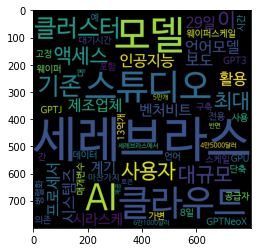

In [ ]:
Tagger("""인공지능(AI) 프로세서 제조업체 세레브라스 시스템즈(Cerebras Systems)가 대규모 언어모델을 활용해 생성 AI 훈련을 강화한다.

벤처비트 29일(현지시간)자 보도에 따르면 세레브라스는 이를 위해 자연어처리 및 컴퓨터 비전용 딥러닝 솔루션 업체인 시라스케일 클라우드 서비스 및 야스퍼와 파트너십을 체결했다.  

이를 계기로 시라스케일 클라우드 서비스에서 세레브라스 AI 모델 '스튜디오'를 호스팅한다. 세레브라스 웨이퍼-스케일 클러스터에서 'GPT-J' 'GPT-3' 'GPT-NeoX'를 포함한 GPT급 AI 모델을 훈련할 수 있도록 할 계획이다.

이를 통해 대규모 언어 모델을 구축할 때 많은 수의 GPU 간 대기 시간을 보장해야 하는 기존 클라우드 제공업체의 문제를 해결할 방침이다. 

가변 대기 시간은 GPU 간에 대규모 AI 모델을 배포하는 데 복잡하고 시간 소모적인 문제를 일으키고 훈련 시간에 큰 변화를 가져온다.

세레브라스 AI 모델 스튜디오를 위한 전용 웨이퍼 스케일 클러스터는 고정 대기시간을 보장한다. 클러스터는 데이터 병렬화에만 의존하기 때문에 분산 컴퓨팅 작업을 필요로 하지 않는다.

세레브라스에 따르면 세레브라스 AI 모델 스튜디오는 기존 클라우드 공급자의 절반 비용에 몇 줄의 코드만으로 GPT급 모델을 훈련할 수 있다. 사용자는 13억개의 매개변수에서 최대 1750억 개의 매개변수에 이르는 최첨단 GPT급 모델 중에서 선택할 수 있으며 엔비디아의 A100보다 8배 더 빠른 정확도로 훈련을 완료할 수 있다.

예를 들어 기존 클라우드를 사용하는 GPT-J의 교육 시간은 처음부터 약 64일이 걸린다. 세레브라스 AI 모델 스튜디오는 이를 8일로 ​​단축한다. 마찬가지로 기존 클라우드에서 GPU 실행 비용만 최대 6만1000달러다. 반면에 세레브라스에서는 전체 실행 비용이 4만5000달러다. 

세레브라스 AI 모델 스튜디오는 세레브라스 웨이퍼-스케일 클러스터에 대한 클라우드 액세스를 제공한다. 사용자는 최대 16노드 세레브라스 웨이퍼-스케일 클러스터에 액세스하고 최대 5만개 토큰의 더 긴 시퀀스 길이를 사용하여 모델을 훈련할 수 있다.

출처 : AI타임스(http://www.aitimes.com)""")

달리2 를 비롯한 이미지 생성 인공지능  모델이 폭발적 인기를 모으고 있는 가운데  최근 오픈 소스로 공개된 새로운 이미지 생성 모델을 두고 논란이 일고 있다.

누구나 AI에 접근하고 쓸 수 있게 하자는 캐치프레이즈로 민주적  AI를 주창하며 오픈소스로 내놓았지만 이를 악용한 사례가 이어진 때문이다.

논란의 중심에 선 것은 영국의 스타트업 스태빌리티 AI 가 지난 10일 소스코드를 오픈소스로 공개한 이미지 생성 AI 도구 스테이블 디퓨전 이다.

스테이블 디퓨전은 개발자는 물론이고 일반인도 무료로 자유롭게 사용할 수 있는 모델이다. 누구나 AI에 접근하고 쓸 수 있게 하자는 민주적  AI 가치관을 따랐다.

회사측은 개발자를 대상으로 공개하면서 블로그에 일반인도 사용할 수 있도록 하겠다고 밝혔다. 

개발자들은 마음대로 스테이블 디퓨전의 코드를 복제해 쓸 수 있다. 앞서 언어 AI모델이 오픈 소스로 공개된 적은 있으나 이미지 생성 AI 모델이 대중에게 오픈 소스로 공개된 것은 처음이다. 

  오픈 소스 언어 모델 블룸  출시오픈AI와 구글에 도전

그러나 이 오픈 소스  AI모델을 공개한 직후 악용 사례가 나오면서 민주적 AI라는 개념에 상처를 내고 있다.  AI의 민주화나 대중화는 큰 위험을 수반한다는 지적이 이어졌다.



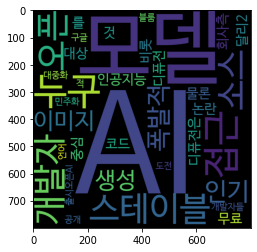

In [ ]:
Tagger("""달리2(DALL-E2)'를 비롯한 이미지 생성 인공지능(AI) 모델이 폭발적 인기를 모으고 있는 가운데  최근 오픈 소스로 공개된 새로운 이미지 생성 모델을 두고 논란이 일고 있다.

'누구나 AI에 접근하고 쓸 수 있게 하자'는 캐치프레이즈로 '민주적(Democratic) AI'를 주창하며 오픈소스로 내놓았지만 이를 악용한 사례가 이어진 때문이다.

논란의 중심에 선 것은 영국의 스타트업 스태빌리티 AI(Stability AI)가 지난 10일 소스코드를 오픈소스로 공개한 이미지 생성 AI 도구 ‘스테이블 디퓨전(Stable Diffusion)’이다.

스테이블 디퓨전은 개발자는 물론이고 일반인도 무료로 자유롭게 사용할 수 있는 모델이다. '누구나 AI에 접근하고 쓸 수 있게 하자'는 민주적(Democratic) AI 가치관을 따랐다.

회사측은 개발자를 대상으로 공개하면서 블로그에 일반인도 사용할 수 있도록 하겠다고 밝혔다. 

개발자들은 마음대로 스테이블 디퓨전의 코드를 복제해 쓸 수 있다. 앞서 언어 AI모델이 오픈 소스로 공개된 적은 있으나 이미지 생성 AI 모델이 대중에게 오픈 소스로 공개된 것은 처음이다. 

[관련 기사] 오픈 소스 언어 모델 ‘블룸(BLOOM)’ 출시…오픈AI와 구글에 도전

그러나 이 오픈 소스  AI모델을 공개한 직후 악용 사례가 나오면서 '민주적 AI'라는 개념에 상처를 내고 있다.  AI의 민주화나 대중화는 큰 위험을 수반한다는 지적이 이어졌다.
""")

In [ ]:
tagging("""'달리2(DALL-E2)'를 비롯한 이미지 생성 인공지능(AI) 모델이 폭발적 인기를 모으고 있는 가운데  최근 오픈 소스로 공개된 새로운 이미지 생성 모델을 두고 논란이 일고 있다.

'누구나 AI에 접근하고 쓸 수 있게 하자'는 캐치프레이즈로 '민주적(Democratic) AI'를 주창하며 오픈소스로 내놓았지만 이를 악용한 사례가 이어진 때문이다.

논란의 중심에 선 것은 영국의 스타트업 스태빌리티 AI(Stability AI)가 지난 10일 소스코드를 오픈소스로 공개한 이미지 생성 AI 도구 ‘스테이블 디퓨전(Stable Diffusion)’이다.

스테이블 디퓨전은 개발자는 물론이고 일반인도 무료로 자유롭게 사용할 수 있는 모델이다. '누구나 AI에 접근하고 쓸 수 있게 하자'는 민주적(Democratic) AI 가치관을 따랐다.
""")

Index: 0 품사: Noun 단어: 달리2 를 비롯 
Index: 1 품사: X 단어: 하 
Index: 2 품사: E 단어: ㄴ 
Index: 3 품사: Noun 단어: 이미지 생성 인공지능 모델 
Index: 4 품사: J 단어: 이 
Index: 5 품사: Noun 단어: 폭발적 인기 
Index: 6 품사: J 단어: 를 
Index: 7 품사: P 단어: 모으 
Index: 8 품사: E 단어: 고 
Index: 9 품사: P 단어: 있 
Index: 10 품사: E 단어: 는 
Index: 11 품사: Noun 단어: 가운데 
Index: 12 품사: M 단어: 최근 
Index: 13 품사: Noun 단어: 오픈 소스 
Index: 14 품사: J 단어: 로 
Index: 15 품사: Noun 단어: 공개 
Index: 16 품사: X 단어: 되 
Index: 17 품사: E 단어: ㄴ 
Index: 18 품사: P 단어: 새롭 
Index: 19 품사: E 단어: 은 
Index: 20 품사: Noun 단어: 이미지 생성 모델 
Index: 21 품사: J 단어: 을 
Index: 22 품사: P 단어: 두 
Index: 23 품사: E 단어: 고 
Index: 24 품사: Noun 단어: 논란 
Index: 25 품사: J 단어: 이 
Index: 26 품사: P 단어: 일 
Index: 27 품사: E 단어: 고 
Index: 28 품사: P 단어: 있 
Index: 29 품사: E 단어: 다 
tag Index를 고르세요20
Index: 0 품사: Noun 단어: 누구 
Index: 1 품사: J 단어: 나 
Index: 2 품사: Noun 단어: AI 
Index: 3 품사: J 단어: 에 
Index: 4 품사: Noun 단어: 접근 
Index: 5 품사: J 단어: 하고 
Index: 6 품사: P 단어: 쓰 
Index: 7 품사: E 단어: ㄹ 
Index: 8 품사: Noun 단어: 수 
Index: 9 품사: P 단어: 있

KeyboardInterrupt: ignored